In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### TASK 1

In [4]:
df=pd.read_csv(r'C:\Users\Raiyana Reyaz\OneDrive\Desktop\data science assignments\Multiple Linear Regression\ToyotaCorolla - MLR.csv')
df

,Price,Age_08_04,KM,Fuel_Type,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
0,13500,23,46986,Diesel,90,0,2000,3,4,5,1165
1,13750,23,72937,Diesel,90,0,2000,3,4,5,1165
2,13950,24,41711,Diesel,90,0,2000,3,4,5,1165
3,14950,26,48000,Diesel,90,0,2000,3,4,5,1165
4,13750,30,38500,Diesel,90,0,2000,3,4,5,1170
...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,Petrol,86,0,1300,3,4,5,1025
1432,10845,72,19000,Petrol,86,0,1300,3,4,5,1015
1433,8500,71,17016,Petrol,86,0,1300,3,4,5,1015
1434,7250,70,16916,Petrol,86,0,1300,3,4,5,1015


In [6]:
print("Shape of dataset: ", df.shape)
print("\nData types:\n", df.dtypes)

Shape of dataset:  (1436, 11)

Data types:
 Price         int64
Age_08_04     int64
KM            int64
Fuel_Type    object
HP            int64
Automatic     int64
cc            int64
Doors         int64
Cylinders     int64
Gears         int64
Weight        int64
dtype: object


In [8]:
df.describe()

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.0,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,0.055710,1576.85585,4.033426,4.0,5.026462,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,0.229441,424.38677,0.952677,0.0,0.188510,52.64112
min,4350.000000,1.000000,1.000000,69.000000,0.000000,1300.00000,2.000000,4.0,3.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,0.000000,1400.00000,3.000000,4.0,5.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,0.000000,1600.00000,4.000000,4.0,5.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,0.000000,1600.00000,5.000000,4.0,5.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,1.000000,16000.00000,5.000000,4.0,6.000000,1615.00000


In [11]:
df.isnull().sum()

Price        0
Age_08_04    0
KM           0
Fuel_Type    0
HP           0
Automatic    0
cc           0
Doors        0
Cylinders    0
Gears        0
Weight       0
dtype: int64

In [12]:
df.duplicated().sum()

np.int64(1)

In [15]:
df.drop_duplicates(inplace=True)

In [16]:
df.duplicated().sum()

np.int64(0)

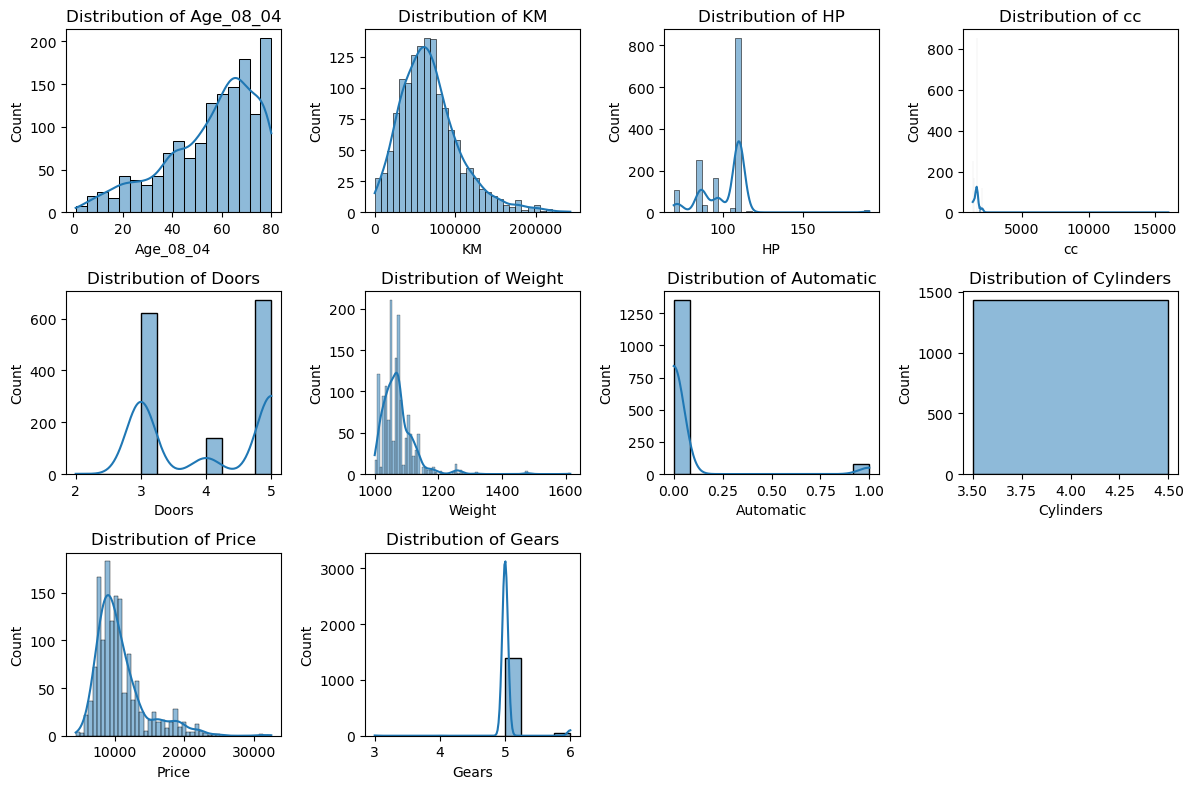

In [21]:
num_cols=['Age_08_04', 'KM', 'HP', 'cc', 'Doors', 'Weight', 'Automatic','Cylinders', 'Price','Gears']
plt.figure(figsize=(12,8))
for i, col in enumerate(num_cols,1):
    plt.subplot(3,4,i)
    sns.histplot(df[col],kde=True)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()

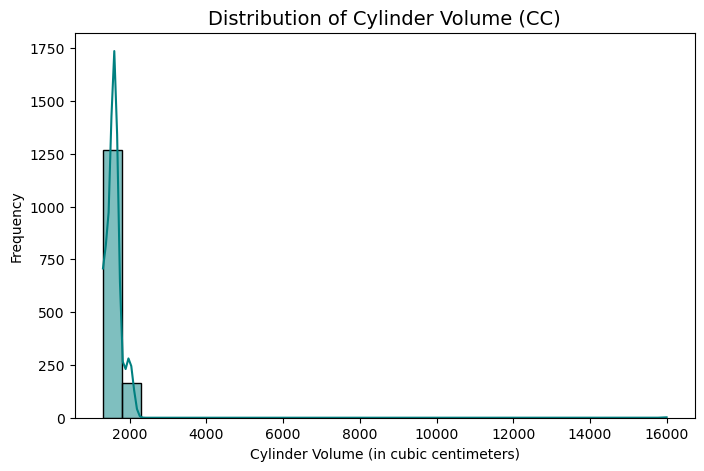

In [23]:
plt.figure(figsize=(8,5))
sns.histplot(df['cc'], bins=30, kde=True, color='teal')
plt.title("Distribution of Cylinder Volume (CC)", fontsize=14)
plt.xlabel("Cylinder Volume (in cubic centimeters)")
plt.ylabel("Frequency")
plt.show()

C:\Users\Raiyana Reyaz\AppData\Local\Temp\ipykernel_9264\1149229956.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Automatic', data=df, palette='Set2')


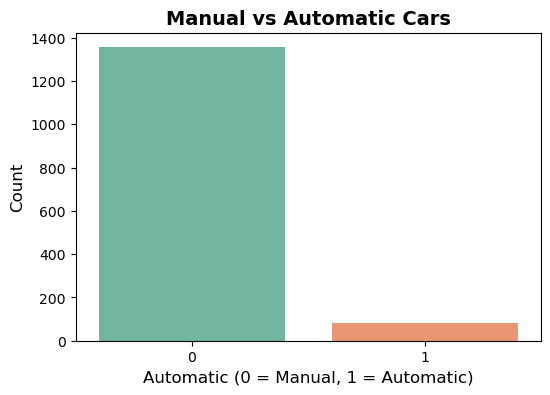

In [27]:
# Automatic Transmission
plt.figure(figsize=(6,4))
sns.countplot(x='Automatic', data=df, palette='Set2')
plt.title("Manual vs Automatic Cars", fontsize=14, weight='bold')
plt.xlabel("Automatic (0 = Manual, 1 = Automatic)", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.show()
# Automatic cars are rare, so while Automatic could slightly influence Price, the small sample size may limit its effect in regression.

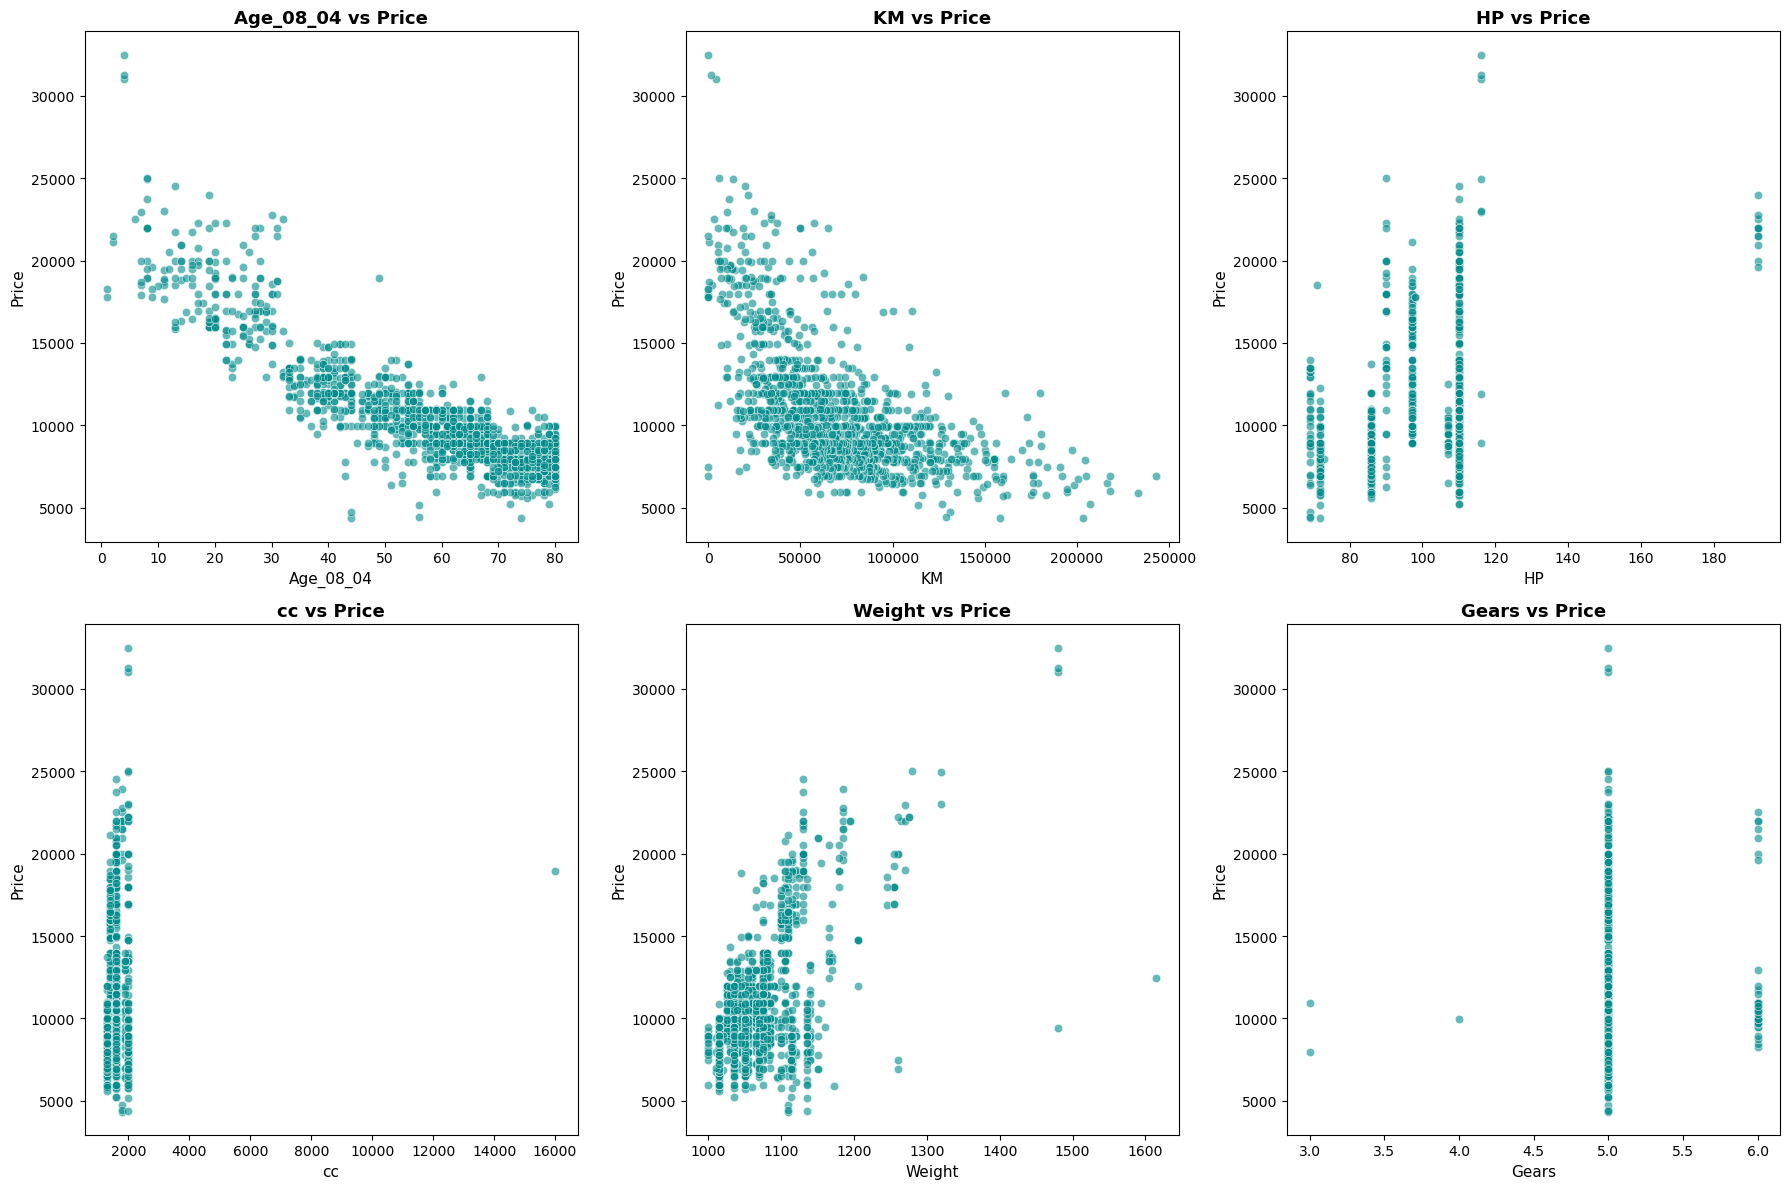

In [34]:
features = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Gears']

plt.figure(figsize=(18, 12))
for i, col in enumerate(features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(x=df[col], y=df['Price'], color='darkcyan', alpha=0.6)
    plt.title(f"{col} vs Price", fontsize=13, weight='bold')
    plt.xlabel(col, fontsize=11)
    plt.ylabel("Price", fontsize=11)
plt.tight_layout()
plt.show()

C:\Users\Raiyana Reyaz\AppData\Local\Temp\ipykernel_9264\1325585992.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='pastel')


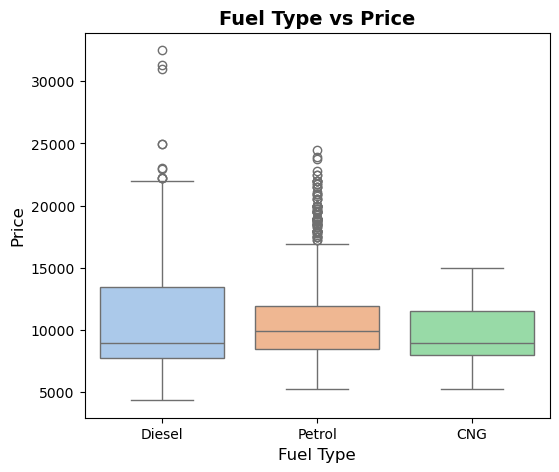

In [35]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Fuel_Type', y='Price', data=df, palette='pastel')
plt.title("Fuel Type vs Price", fontsize=14, weight='bold')
plt.xlabel("Fuel Type", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()


C:\Users\Raiyana Reyaz\AppData\Local\Temp\ipykernel_9264\1876274577.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Automatic', y='Price', data=df, palette='Set2')


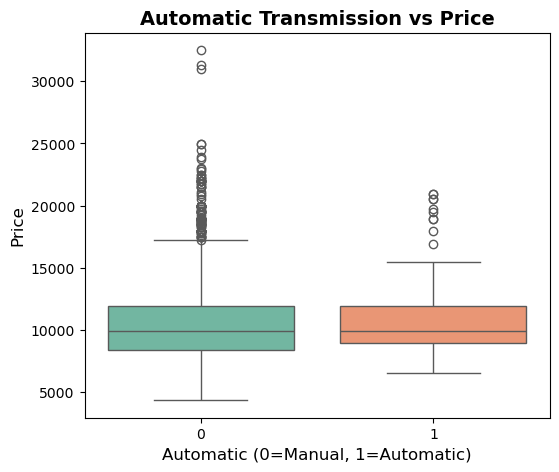

In [37]:
plt.figure(figsize=(6,5))
sns.boxplot(x='Automatic', y='Price', data=df, palette='Set2')
plt.title("Automatic Transmission vs Price", fontsize=14, weight='bold')
plt.xlabel("Automatic (0=Manual, 1=Automatic)", fontsize=12)
plt.ylabel("Price", fontsize=12)
plt.show()

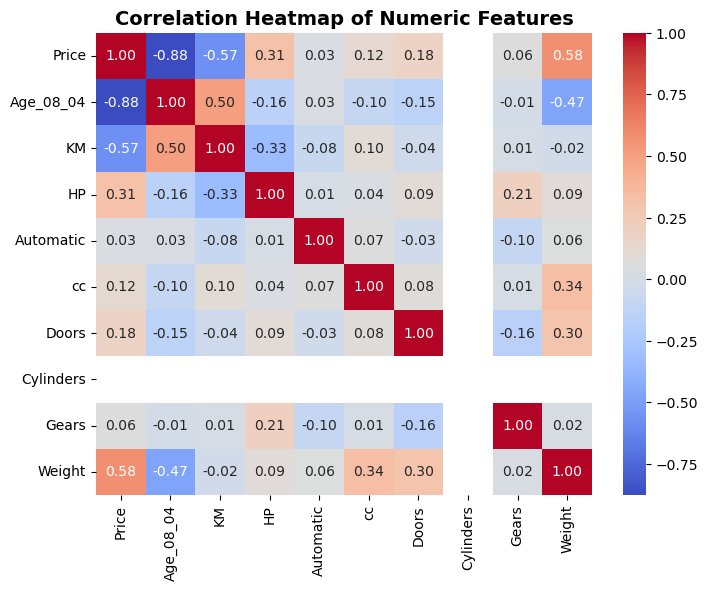

In [43]:

plt.figure(figsize=(8,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap of Numeric Features", fontsize=14, weight='bold')
plt.show()

ValueError: num must be an integer with 1 <= num <= 8, not 9

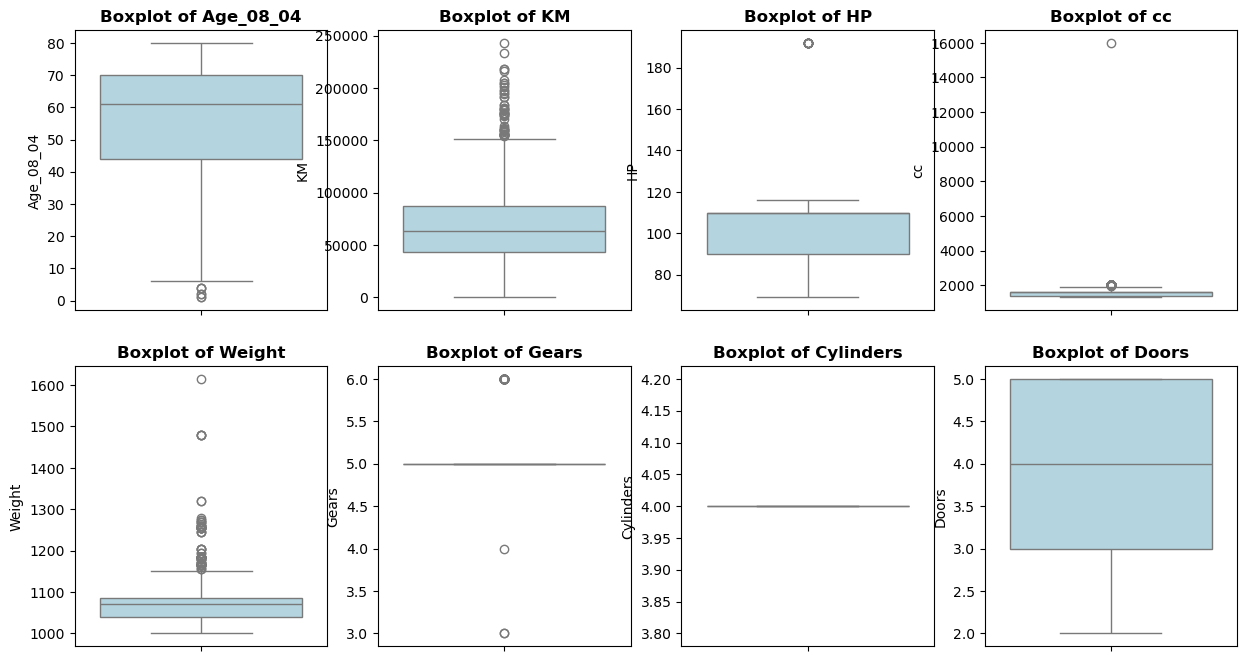

In [44]:
num_cols = ['Age_08_04', 'KM', 'HP', 'cc', 'Weight', 'Gears','Cylinders','Doors', 'Price']

plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols, 1):
    plt.subplot(2, 4, i)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f"Boxplot of {col}", fontsize=12, weight='bold')
plt.tight_layout()
plt.show()

In [45]:
Q1 = df['KM'].quantile(0.25)
Q3 = df['KM'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['KM'] = np.where(df['KM']>upper_bound, upper_bound,
                    np.where(df['KM']<lower_bound, lower_bound, df['KM']))


In [47]:
Q1 = df['HP'].quantile(0.25)
Q3 = df['HP'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['HP'] = np.where(df['HP']>upper_bound, upper_bound,
                    np.where(df['HP']<lower_bound, lower_bound, df['HP']))


In [52]:
Q1 = df['Weight'].quantile(0.25)
Q3 = df['Weight'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['Weight'] = np.where(df['Weight']>upper_bound, upper_bound,
                    np.where(df['Weight']<lower_bound, lower_bound, df['Weight']))


In [51]:
Q1 = df['Gears'].quantile(0.25)
Q3 = df['Gears'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['Gears'] = np.where(df['Gears']>upper_bound, upper_bound,
                    np.where(df['Gears']<lower_bound, lower_bound, df['Gears']))


In [50]:
Q1 = df['cc'].quantile(0.25)
Q3 = df['cc'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['cc'] = np.where(df['cc']>upper_bound, upper_bound,
                    np.where(df['cc']<lower_bound, lower_bound, df['cc']))


In [46]:
Q1 = df['Age_08_04'].quantile(0.25)
Q3 = df['Age_08_04'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR

df['Age_08_04'] = np.where(df['Age_08_04']>upper_bound, upper_bound,
                    np.where(df['Age_08_04']<lower_bound, lower_bound, df['Age_08_04']))


In [59]:
#One hot encoding
df = pd.get_dummies(df, columns=['FuelType'], drop_first=True)

KeyError: "None of [Index(['Fuel_Type'], dtype='object')] are in the [columns]"

In [61]:
df = df.astype({col: int for col in df.columns if df[col].dtype == 'bool'})

In [62]:
df

,Price,Age_08_04,KM,HP,Automatic,cc,Doors,Cylinders,Gears,Weight,Fuel_Type_Diesel,Fuel_Type_Petrol
0,13500,23.0,46986.0,90.0,0,1900.0,3,4,5.0,1152.5,1,0
1,13750,23.0,72937.0,90.0,0,1900.0,3,4,5.0,1152.5,1,0
2,13950,24.0,41711.0,90.0,0,1900.0,3,4,5.0,1152.5,1,0
3,14950,26.0,48000.0,90.0,0,1900.0,3,4,5.0,1152.5,1,0
4,13750,30.0,38500.0,90.0,0,1900.0,3,4,5.0,1152.5,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1431,7500,69.0,20544.0,86.0,0,1300.0,3,4,5.0,1025.0,0,1
1432,10845,72.0,19000.0,86.0,0,1300.0,3,4,5.0,1015.0,0,1
1433,8500,71.0,17016.0,86.0,0,1300.0,3,4,5.0,1015.0,0,1
1434,7250,70.0,16916.0,86.0,0,1300.0,3,4,5.0,1015.0,0,1


In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
numeric_cols = ['Age', 'KM', 'HP', 'CC', 'Weight', 'Quarterly_Tax']  # predictors only
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

### TASK 2

In [63]:
X = df.iloc[:, 1:].values  # all columns except Price
y = df.iloc[:, 0].values   # Price

In [66]:
from sklearn.model_selection import train_test_split
# Train/Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [67]:
#Scaling Numeric Features
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)  # fit on train
X_test = sc.transform(X_test)        # transform test using same scaler

In [68]:
y_train_log = np.log(y_train)
y_test_log = np.log(y_test)


### TASK 3

In [74]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [100]:
# Model 1: single predictor (e.g., Age)
X_train1 = X_train[:, [0]]  # Age column
X_test1  = X_test[:, [0]]
model1 = LinearRegression()
model1.fit(X_train1, y_train)
y_pred1 = model1.predict(X_test1)

# Model 2: two predictors (Age + KM)
X_train2 = X_train[:, [0,1]]  # Age and KM
X_test2  = X_test[:, [0,1]]

model2 = LinearRegression()
model2.fit(X_train2, y_train)
y_pred2 = model2.predict(X_test2)

# Model 3: three predictors (Age + KM + Weight)
X_train3 = X_train[:, [0, 1,8]]
X_test3  = X_test[:, [0,1,8]]

# Train model
model3 = LinearRegression()
model3.fit(X_train3, y_train)
y_pred3 = model3.predict(X_test3)




### TASK 4

In [92]:
# R-squared
r2_model1 = r2_score(y_test, y_pred1)

# Root Mean Squared Error
rmse_model1 = np.sqrt(mean_squared_error(y_test, y_pred1))

print("Model 1 R²:", r2_model1)
print("Model 1 RMSE:", rmse_model1)

print("Intercept:", model1.intercept_)
print("Coefficients:", model1.coef_)

Model 1 R²: 0.7703798499414748
Model 1 RMSE: 1659.754095326957
Intercept: 10727.046167247387
Coefficients: [-3189.03571013]


In [95]:
rmse_model2 = np.sqrt(mean_squared_error(y_test, y_pred2))
print("Model 2 R²:", r2_score(y_test, y_pred2))
print("Model 2 RMSE:", rmse_model2)

print("Intercept:", model2.intercept_)
print("Coefficients:", model2.coef_) 

""" Adding KM improves the model slightly."""

Model 2 R²: 0.7850059812212216
Model 2 RMSE: 1606.0236621630042
Intercept: 10727.046167247387
Coefficients: [-2842.68873357  -642.70697056]


' Adding KM improves the model slightly.'

In [99]:
rmse_model3 = np.sqrt(mean_squared_error(y_test, y_pred3))
print("Model 3 R²:", r2_score(y_test, y_pred3))
print("Model 3 RMSE:", rmse_model2)

print("Intercept:", model3.intercept_)
print("Coefficients:", model3.coef_) 

""" 81.8% of Price variation explained → significant improvement. RMSE ≈ 1606 → slightly improved from Model 2.
 Adding Weight improved model performance and gives more realistic interpretation of car pricing."""

Model 3 R²: 0.8184599307980809
Model 3 RMSE: 1606.0236621630042
Intercept: 10727.046167247388
Coefficients: [-2266.1853166   -945.24855235   867.03429188]


' 81.8% of Price variation explained → significant improvement. RMSE ≈ 1606 → slightly improved from Model 2.\n Adding Weight improved model performance and gives more realistic interpretation of car pricing.'

1) Most important predictor: Age (strong negative correlation with Price)
2) Adding KM improves fit → mileage is important
3) Adding Weight further improves R² → heavier cars are more expensive
4) Model 3 is the best among the three → highest R², reasonable coefficients, lower RMSE

### TASK 5

#### LASSO

In [102]:
from sklearn.linear_model import LassoCV

In [104]:
# Initialize LassoCV with 5-fold CV
lasso_cv = LassoCV(cv=5, max_iter=1000, random_state=42)
# Fit on training data
lasso_cv.fit(X_train3, y_train)

LassoCV(cv=5, random_state=42)

In [108]:
# Best alpha
best_alpha = lasso_cv.alpha_
print("Best alpha from LassoCV:", best_alpha)

# Predictions
y_train_lasso = lasso_cv.predict(X_train3)
y_test_lasso = lasso_cv.predict(X_test3)

# Evaluation
print("Train R²:", r2_score(y_train, y_train_lasso))
print("Test R² :", r2_score(y_test, y_test_lasso))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_lasso)))

# Coefficients
print("Lasso coefficients:", lasso_cv.coef_)
print("Intercept:", lasso_cv.intercept_)

Best alpha from LassoCV: 3.419498461795498
Train R²: 0.8274785996700829
Test R² : 0.8185146770210747
Test RMSE: 1475.5689402389269
Lasso coefficients: [-2266.3777948   -941.75857129   863.55572649]
Intercept: 10727.046167247388


1) Train and test R² are close → model generalizes well, no major overfitting.
2) Test RMSE ≈ 1476 → average error in predicted Price is 1476.
( Compared to your original Model 3 (MLR) RMSE ≈ 1606 → Lasso improved prediction accuracy slightly. )


#### Ridge

In [109]:
from sklearn.linear_model import RidgeCV

In [113]:
# Initialize RidgeCV with 5-fold CV and a range of alphas to test
alphas = np.logspace(-3, 3, 100)  # from 0.001 to 1000
ridge_cv = RidgeCV(alphas=alphas, cv=5, scoring='neg_mean_squared_error')
ridge_cv.fit(X_train3, y_train)

best_alpha_ridge = ridge_cv.alpha_
print("Best alpha from RidgeCV:", best_alpha_ridge)

# Predictions
y_train_ridge = ridge_cv.predict(X_train3)
y_test_ridge = ridge_cv.predict(X_test3)

# Evaluation
print("Train R²:", r2_score(y_train, y_train_ridge))
print("Test R² :", r2_score(y_test, y_test_ridge))
print("Test RMSE:", np.sqrt(mean_squared_error(y_test, y_test_ridge)))

# Coefficients
print("Ridge coefficients:", ridge_cv.coef_)
print("Intercept:", ridge_cv.intercept_)

Best alpha from RidgeCV: 2.848035868435802
Train R²: 0.8274778686064322
Test R² : 0.8184326120218721
Test RMSE: 1475.9025178416243
Ridge coefficients: [-2259.33930837  -946.57914635   868.13278793]
Intercept: 10727.046167247388


1) Very close to LassoCV results → good generalization.
2) Almost identical to LassoCV RMSE → both regularization methods improved slightly over the original MLR (RMSE ≈ 1606).

## INTERVIEW QUESTIONS: 
1) What is Normalization & Standardization and how is it helpful?
1. Normalization:
- Scales numeric data to a fixed range, usually 0 to 1
- Formula: X_norm = (X - X_min) / (X_max - X_min)
- Useful for algorithms sensitive to magnitude (KNN, Neural Networks)
- Prevents features with larger values from dominating
2. Standardization:
- Rescales data to have mean = 0 and standard deviation = 1
- Formula: X_std = (X - mean) / std_dev
- Useful for algorithms assuming normally distributed data (Linear Regression, SVM, PCA)
- Handles outliers better than normalization

2) What techniques can be used to address multicollinearity in multiple linear regression?
- Remove Highly Correlated Variables
- If variables are measuring the same concept, combine them into a single feature-Sum, average, or weighted sum
- Use Regularization Techniques
- a) Ridge Regression: Penalizes large coefficients, reduces variance, and handles multicollinearity.
- b) Lasso Regression: Can shrink some coefficients to zero, effectively performing variable selection